In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/heart_failure_clinical_records_dataset.csv


In [2]:
dataset = pd.read_csv("input/heart_failure_clinical_records_dataset.csv")

In [3]:
dataset.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [4]:
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
# Input columns:
dataset.iloc[:,:-1]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  
0          0     4  
1          0     6  
2          1     7  
3          0     7  
4          0     8  
..       ...   ...  
294        1   270  
295        0   271  
296        0   278  
297        1   280  
298        1   285  

[299 rows x 12 columns]

In [6]:
# Output column:
dataset['DEATH_EVENT']

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [7]:
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 
                     'platelets', 'serum_creatinine', 'serum_sodium', 'time'],

In [8]:
dataset.corr()

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
DEATH_EVENT              -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
DEATH_EVENT               -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  DEATH_EVENT  
age                       0.018668 -0.224068     0.253729  
anaemia                  -0.107290 -0.141414     0.066270  
creatinine_phosphokinase  0.002421 -0.009346     0.062728  
diabetes                 -0.147173  0.033726    -0.001943  
ejection_fraction        -0.067315  0.041729    -0.268603  
high_blood_pressure      -0.055711 -0.196439     0.079351  
platelets                 0.028234  0.010514    -0.049139  
serum_creatinine         -0.027414 -0.149315     0.294278  
serum_sodium              0.004813  0.087640    -0.195204  
sex                       0.445892 -0.015608    -0.004316  
smoking                   1.000000 -0.022839    -0.012623  
time                     -0.022839  1.000000  

Significant correlation with DEATH_EVENT observed for the following features:
* Age: 0.253729
* Serum creatinine: 0.294278 
* Serum sodium: -0.195204
* Time:  -0.526964
* Ejection Fraction: -0.268603 

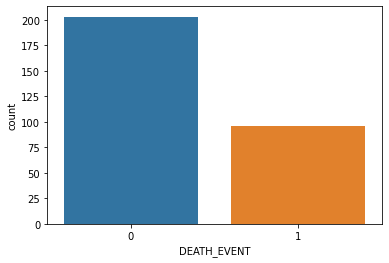

In [9]:
import seaborn as sns
sns.countplot(x="DEATH_EVENT", data=dataset)

The number of deaths are half that of the number of patients alive, i.e. 100 deaths against 200 alive.
This data needs to be balanced, via oversampling of the minority class(deaths) or undersampling the majority class(alive).

Here, we use the SMOTE technique to oversample the minority class.


In [10]:
from imblearn.over_sampling import SMOTE
oversampling_func = SMOTE(random_state=42)

In [11]:
# To oversample the dataset needs to split into X and y
X = dataset.iloc[:,:-1]
y = dataset[["DEATH_EVENT"]]

In [12]:
print("Size of dataset before oversampling: "+str(len(X)))

Size of dataset before oversampling: 299


SMOTE is used to oversample X and y, and are saved into new data frames X_smote and y_smote.

In [13]:
X_smote, y_smote = oversampling_func.fit_resample(X, y)

In [14]:
smote_dataset = pd.concat((X_smote,y_smote),axis=1) # X_smote and y_smote are combined to create the countplot below

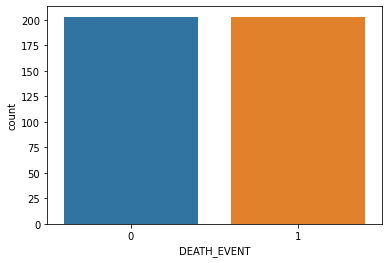

In [15]:
sns.countplot(x="DEATH_EVENT", data=smote_dataset)

In [16]:
print('Size of SMOTE dataset: '+str(len(X_smote)))

Size of SMOTE dataset: 406


In [17]:
smote_dataset.corr()

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.086359                 -0.096345   
anaemia                   0.086359  1.000000                 -0.199014   
creatinine_phosphokinase -0.096345 -0.199014                  1.000000   
diabetes                 -0.130923 -0.000365                 -0.028910   
ejection_fraction         0.047630  0.116099                 -0.064061   
high_blood_pressure       0.038809  0.107925                 -0.030571   
platelets                -0.071589 -0.050833                  0.067405   
serum_creatinine          0.131770  0.018360                 -0.003432   
serum_sodium             -0.044833  0.089966                  0.057457   
sex                       0.004236 -0.002348                  0.068037   
smoking                  -0.041741 -0.041657                 -0.017289   
time                     -0.264978 -0.072236                  0.007377   
DEATH_EVENT               0.308981 -0.071251                  0.058830   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.130923           0.047630             0.038809   
anaemia                  -0.000365           0.116099             0.107925   
creatinine_phosphokinase -0.028910          -0.064061            -0.030571   
diabetes                  1.000000           0.058041             0.024535   
ejection_fraction         0.058041           1.000000             0.081996   
high_blood_pressure       0.024535           0.081996             1.000000   
platelets                 0.076430           0.063742             0.056510   
serum_creatinine         -0.084044           0.015212            -0.011715   
serum_sodium             -0.090358           0.187061             0.074096   
sex                      -0.148780          -0.137111            -0.041938   
smoking                  -0.074121          -0.007385             0.016125   
time                      0.063988           0.080261            -0.133328   
DEATH_EVENT              -0.117874          -0.311821            -0.059235   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.071589          0.131770     -0.044833  0.004236   
anaemia                   -0.050833          0.018360      0.089966 -0.002348   
creatinine_phosphokinase   0.067405         -0.003432      0.057457  0.068037   
diabetes                   0.076430         -0.084044     -0.090358 -0.148780   
ejection_fraction          0.063742          0.015212      0.187061 -0.137111   
high_blood_pressure        0.056510         -0.011715      0.074096 -0.041938   
platelets                  1.000000         -0.005889      0.092538 -0.115595   
serum_creatinine          -0.005889          1.000000     -0.193392 -0.037238   
serum_sodium               0.092538         -0.193392      1.000000  0.020411   
sex                       -0.115595         -0.037238      0.020411  1.000000   
smoking                    0.034879         -0.072616      0.024844  0.424802   
time                      -0.023076         -0.158935      0.108934  0.067233   
DEATH_EVENT               -0.031993          0.307839     -0.221884 -0.115339   

                           smoking      time  DEATH_EVENT  
age                      -0.041741 -0.264978     0.308981  
anaemia                  -0.041657 -0.072236    -0.071251  
creatinine_phosphokinase -0.017289  0.007377     0.058830  
diabetes                 -0.074121  0.063988    -0.117874  
ejection_fraction        -0.007385  0.080261    -0.311821  
high_blood_pressure       0.016125 -0.133328    -0.059235  
platelets                 0.034879 -0.023076    -0.031993  
serum_creatinine         -0.072616 -0.158935     0.307839  
serum_sodium              0.024844  0.108934    -0.221884  
sex                       0.424802  0.067233    -0.115339  
smoking                   1.000000  0.048437    -0.164156  
time                      0.048437  1.000000  

Significant correlation with DEATH_EVENT observed for the following features:

* Age
* Serum creatinine
* Serum sodium
* Time
* Ejection Fraction

Only the significant features observed in the correlation are captured here. 

In [18]:
features = ["age", "serum_creatinine", "serum_sodium", "time", "ejection_fraction"]
input_data = smote_dataset[features]
output_data = smote_dataset["DEATH_EVENT"]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.2, random_state = 1)

Since the features like age, serum_sodium, serum_creatinine are on different scales, the data is scaled, using StandardScaler. 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train[0:5]  # Training data after scaling

array([[-0.22485702,  0.13686528, -2.16442329,  1.18671304, -0.6152039 ],
       [-1.98770707, -0.48735688,  1.31181504,  1.27830621, -0.19110589],
       [-0.84185454, -0.66570606, -0.31042951, -1.23396349,  1.92938416],
       [ 0.99104003,  0.13011357, -0.31042951, -0.7890824 ,  0.14817251],
       [-1.10628205, -0.39818228,  0.15306893, -1.37789561,  0.06335291]])

In [23]:
X_test[0:5]  # Testing data after scaling

array([[ 2.53957353, -0.34836663,  0.15306893, -1.14237032,  0.06335291],
       [-0.66556953, -0.39818228,  0.61656737, -0.73674344, -0.19110589],
       [ 1.97399445, -0.52770068,  0.61656737, -1.26013296, -0.19110589],
       [-1.81142207, -0.32684261,  0.15306893, -0.44887921,  1.92938416],
       [-0.92999704, -0.75488066, -0.07868029, -0.05633707, -0.6152039 ]])

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=15, random_state = 42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier: "+str(accuracy_score(y_test, y_pred)))

Accuracy of Random Forest Classifier: 0.9390243902439024


In [26]:
# Iterating through various K Nearest Neighbours Classifiers 
from sklearn.neighbors import KNeighborsClassifier
acc_list = []
max_val = 0
for neighbours in range(1,41):
    knn_clf = KNeighborsClassifier(n_neighbors=neighbours)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    accuracy_val = accuracy_score(y_test, y_pred)
    acc_list.append(int(accuracy_val))
    print(str(neighbours)+": "+str(accuracy_val))
    if accuracy_val > max_val:
        no_of_neighbours = neighbours
        max_val = accuracy_val
        
print("Optimal number of neighbours: "+str(no_of_neighbours)+" with accuracy "+str(max_val))
knn_acc = max_val

1: 0.8658536585365854
2: 0.8780487804878049
3: 0.8536585365853658
4: 0.8780487804878049
5: 0.8902439024390244
6: 0.926829268292683
7: 0.9024390243902439
8: 0.9024390243902439
9: 0.8780487804878049
10: 0.8902439024390244
11: 0.8902439024390244
12: 0.8902439024390244
13: 0.8902439024390244
14: 0.8780487804878049
15: 0.8780487804878049
16: 0.8780487804878049
17: 0.8780487804878049
18: 0.8902439024390244
19: 0.8902439024390244
20: 0.8902439024390244
21: 0.8780487804878049
22: 0.8902439024390244
23: 0.9024390243902439
24: 0.9146341463414634
25: 0.9146341463414634
26: 0.9024390243902439
27: 0.9024390243902439
28: 0.9024390243902439
29: 0.8902439024390244
30: 0.8902439024390244
31: 0.8902439024390244
32: 0.8902439024390244
33: 0.8902439024390244
34: 0.8902439024390244
35: 0.8902439024390244
36: 0.8780487804878049
37: 0.8780487804878049
38: 0.8780487804878049
39: 0.8658536585365854
40: 0.8780487804878049
Optimal number of neighbours: 6 with accuracy 0.926829268292683


In [27]:
from sklearn.svm import SVC
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
print("Accuracy of SVM classifier "+str(accuracy_score(y_test, y_pred)))
svc_acc = accuracy_score(y_test, y_pred)

Accuracy of SVM classifier 0.8902439024390244


In [28]:
acc_list=[svc_acc,knn_acc,rf_acc]

In [29]:
print("Maximum Accuracy achieved: "+str(max(acc_list)))
print("Accuracy of various classifiers:")
print("* SVM Classifier: "+str(svc_acc))
print("* KNN Classifier: "+str(knn_acc))
print("* Random Forest Classifier: "+str(rf_acc))

Maximum Accuracy achieved: 0.9390243902439024
Accuracy of various classifiers:
* SVM Classifier: 0.8902439024390244
* KNN Classifier: 0.926829268292683
* Random Forest Classifier: 0.9390243902439024
